# Global Wheat Detection.ipynb

In [1]:
import os,ast
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [2]:
!ls global-wheat-detection

sample_submission.csv
test
train
train.csv


In [3]:
BASE_DIR="global-wheat-detection"

In [4]:
%%time
train_df = pd.read_csv(os.path.join(BASE_DIR, 'train.csv'))
sample_sub_df = pd.read_csv(os.path.join(BASE_DIR, 'sample_submission.csv'))

Wall time: 166 ms


In [5]:
train_df.head()

image_id  width  height                         bbox   source
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1

In [6]:
sample_sub_df.head()

image_id PredictionString
0  aac893a91    1.0 0 0 50 50
1  51f1be19e    1.0 0 0 50 50
2  f5a1f0358    1.0 0 0 50 50
3  796707dd7    1.0 0 0 50 50
4  51b3e36ab    1.0 0 0 50 50

In [7]:
print(f'Shape of training data: {train_df.shape}')
print(f'Shape of given test data: {sample_sub_df.shape}')

Shape of training data: (147793, 5)
Shape of given test data: (10, 2)


In [8]:
print(f'# of unique images: {train_df["image_id"].nunique()}')

# of unique images: 3373


In [9]:
print(f'Unique heights and widths: {train_df["width"].unique()}, {train_df["height"].unique()}')

Unique heights and widths: [1024], [1024]


In [10]:
print(f'Minimum number of wheat heads: {max(train_df["image_id"].value_counts())}')
print(f'Minimum number of wheat heads: {len(train_df)/train_df["image_id"].nunique()}')

Minimum number of wheat heads: 116
Minimum number of wheat heads: 43.8164838422769


In [11]:
print(f'Total number of images: {len(os.listdir(os.path.join(BASE_DIR, "train")))}')

Total number of images: 3422


c:\users\deven\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


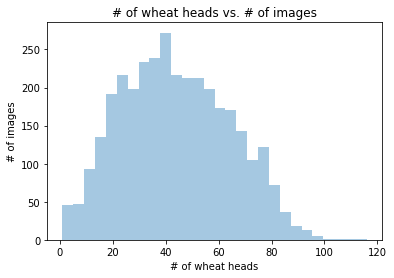

In [12]:
sns.distplot(train_df['image_id'].value_counts(), kde=False)
plt.xlabel('# of wheat heads')
plt.ylabel('# of images')
plt.title('# of wheat heads vs. # of images')
plt.show()

In [13]:
train_df[['x_min','y_min', 'width', 'height']] = pd.DataFrame([ast.literal_eval(x) for x in train_df.bbox.tolist()], index= train_df.index)
train_df = train_df[['image_id', 'bbox', 'source', 'x_min', 'y_min', 'width', 'height']]
train_df

image_id                         bbox     source  x_min  y_min  \
0       b6ab77fd7   [834.0, 222.0, 56.0, 36.0]    usask_1  834.0  222.0   
1       b6ab77fd7  [226.0, 548.0, 130.0, 58.0]    usask_1  226.0  548.0   
2       b6ab77fd7  [377.0, 504.0, 74.0, 160.0]    usask_1  377.0  504.0   
3       b6ab77fd7  [834.0, 95.0, 109.0, 107.0]    usask_1  834.0   95.0   
4       b6ab77fd7  [26.0, 144.0, 124.0, 117.0]    usask_1   26.0  144.0   
...           ...                          ...        ...    ...    ...   
147788  5e0747034    [64.0, 619.0, 84.0, 95.0]  arvalis_2   64.0  619.0   
147789  5e0747034  [292.0, 549.0, 107.0, 82.0]  arvalis_2  292.0  549.0   
147790  5e0747034  [134.0, 228.0, 141.0, 71.0]  arvalis_2  134.0  228.0   
147791  5e0747034   [430.0, 13.0, 184.0, 79.0]  arvalis_2  430.0   13.0   
147792  5e0747034   [875.0, 740.0, 94.0, 61.0]  arvalis_2  875.0  740.0   

        width  height  
0        56.0    36.0  
1       130.0    58.0  
2        74.0   160.0  
3       109.0   107.0  
4       124.0   117.0  
...       ...     ...  
147788   84.0    95.0  
147789  107.0    82.0  
147790  141.0    71.0  
147791  184.0    79.0  
147792   94.0    61.0  

[147793 rows x 7 columns]

c:\users\deven\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


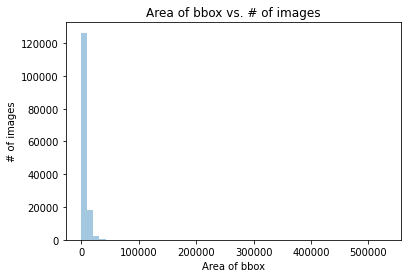

In [14]:
sns.distplot(train_df['width'] * train_df['height'], kde=False)
plt.xlabel('Area of bbox')
plt.ylabel('# of images')
plt.title('Area of bbox vs. # of images')
plt.show()

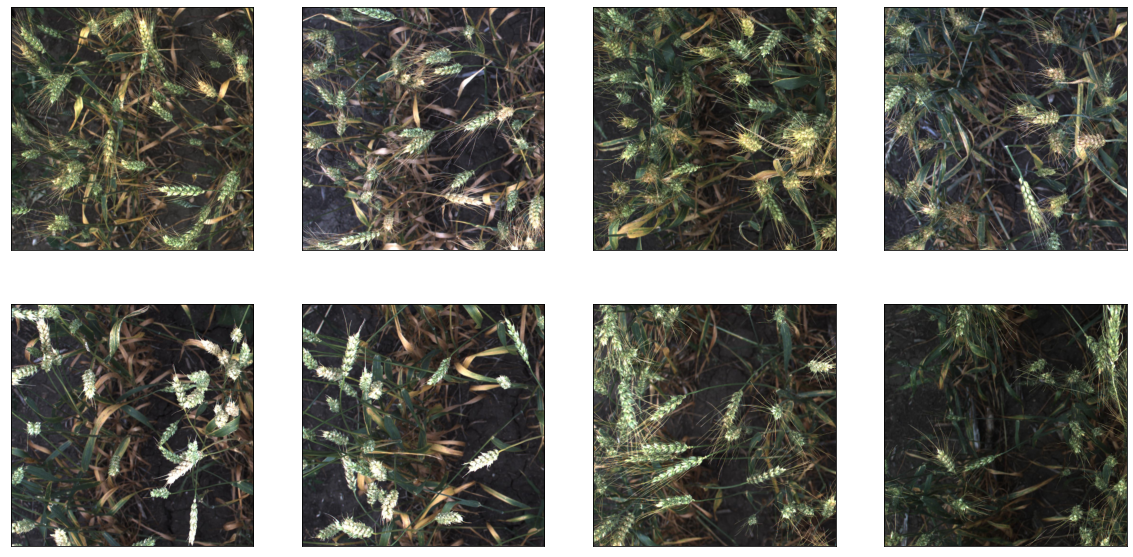

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
count=0
for row in ax:
    for col in row:
        img = plt.imread(f'{os.path.join(BASE_DIR, "train", train_df["image_id"].unique()[count])}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        col.imshow(img)
        count += 1
plt.show()

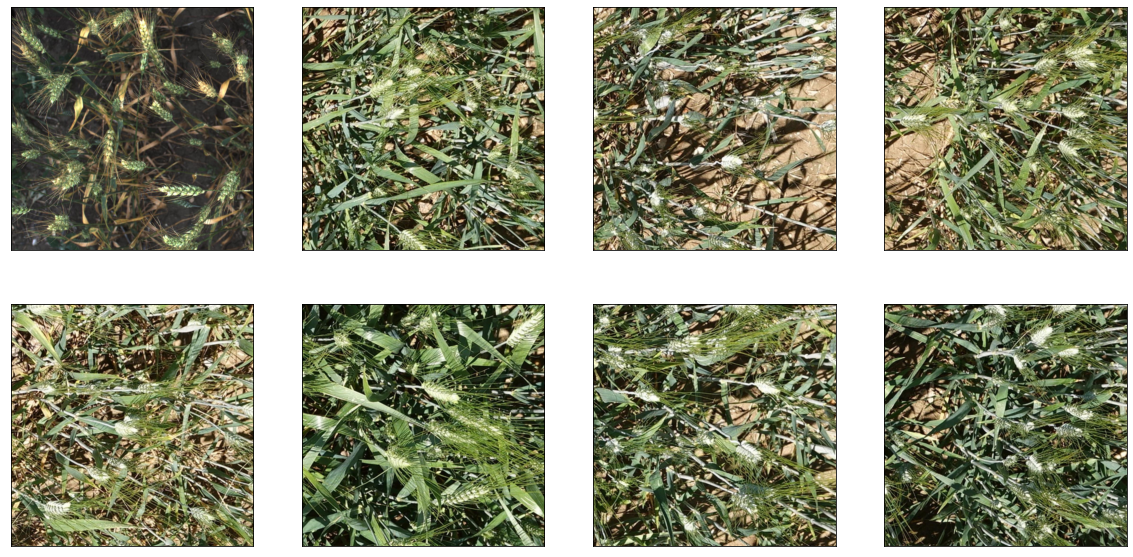

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
count=0
for row in ax:
    for col in row:
        img = plt.imread(f'{os.path.join(BASE_DIR, "train", train_df["image_id"].unique()[-count])}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        col.imshow(img)
        count += 1
plt.show()

In [17]:
def get_bbox(image_id, df, col, color='white'):
    bboxes = df[df['image_id'] == image_id]
    
    for i in range(len(bboxes)):
       
        rect = patches.Rectangle(
            (bboxes['x_min'].iloc[i], bboxes['y_min'].iloc[i]),
            bboxes['width'].iloc[i], 
            bboxes['height'].iloc[i], 
            linewidth=2, 
            edgecolor=color, 
            facecolor='none')

      
        col.add_patch(rect)

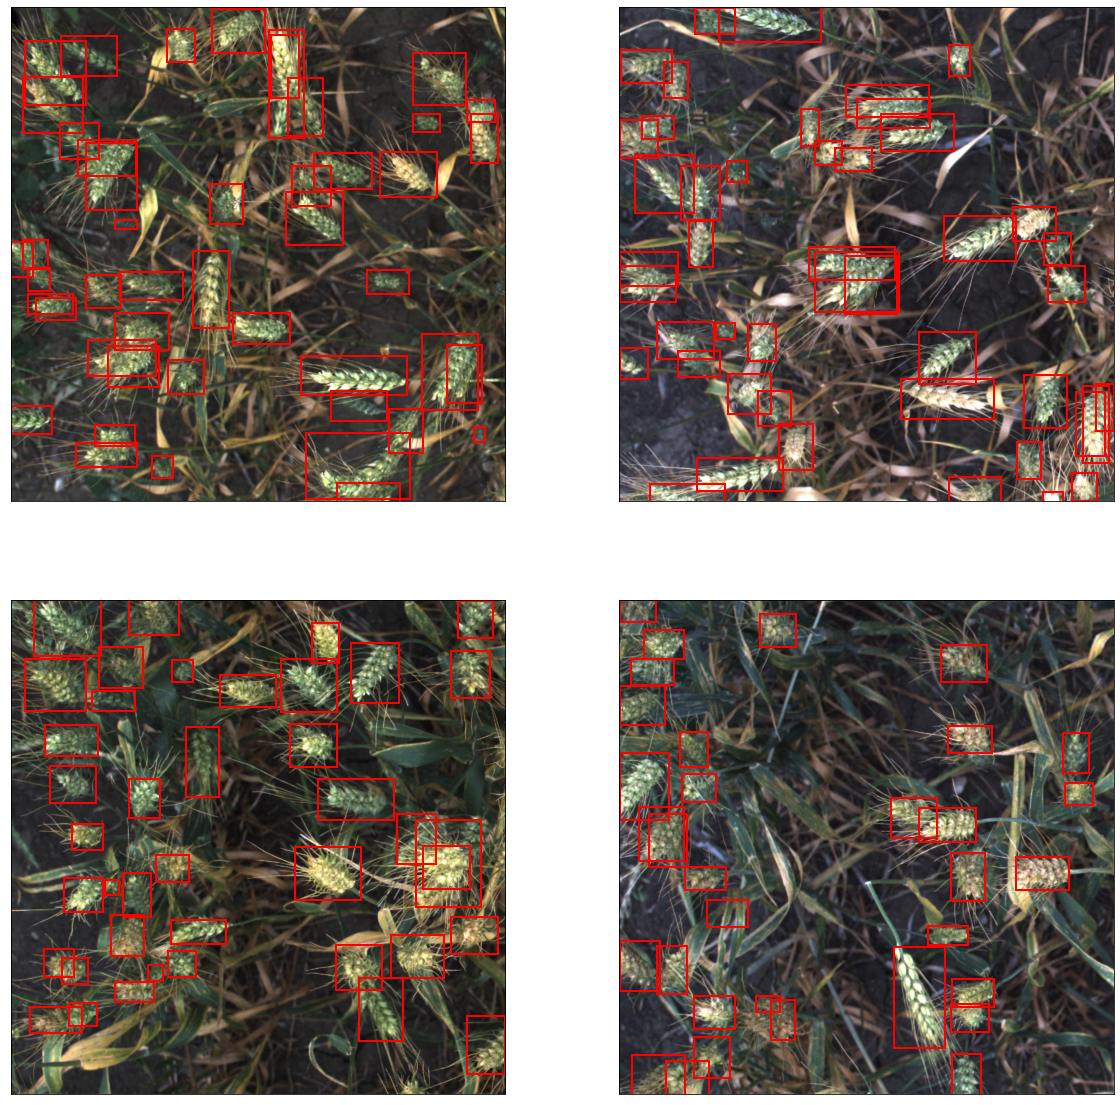

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
count=0
for row in ax:
    for col in row:
        img_id = train_df["image_id"].unique()[count]
        img = plt.imread(f'{os.path.join(BASE_DIR, "train", img_id)}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        get_bbox(img_id, train_df, col, color='red')
        col.imshow(img)
        count += 1
plt.show()

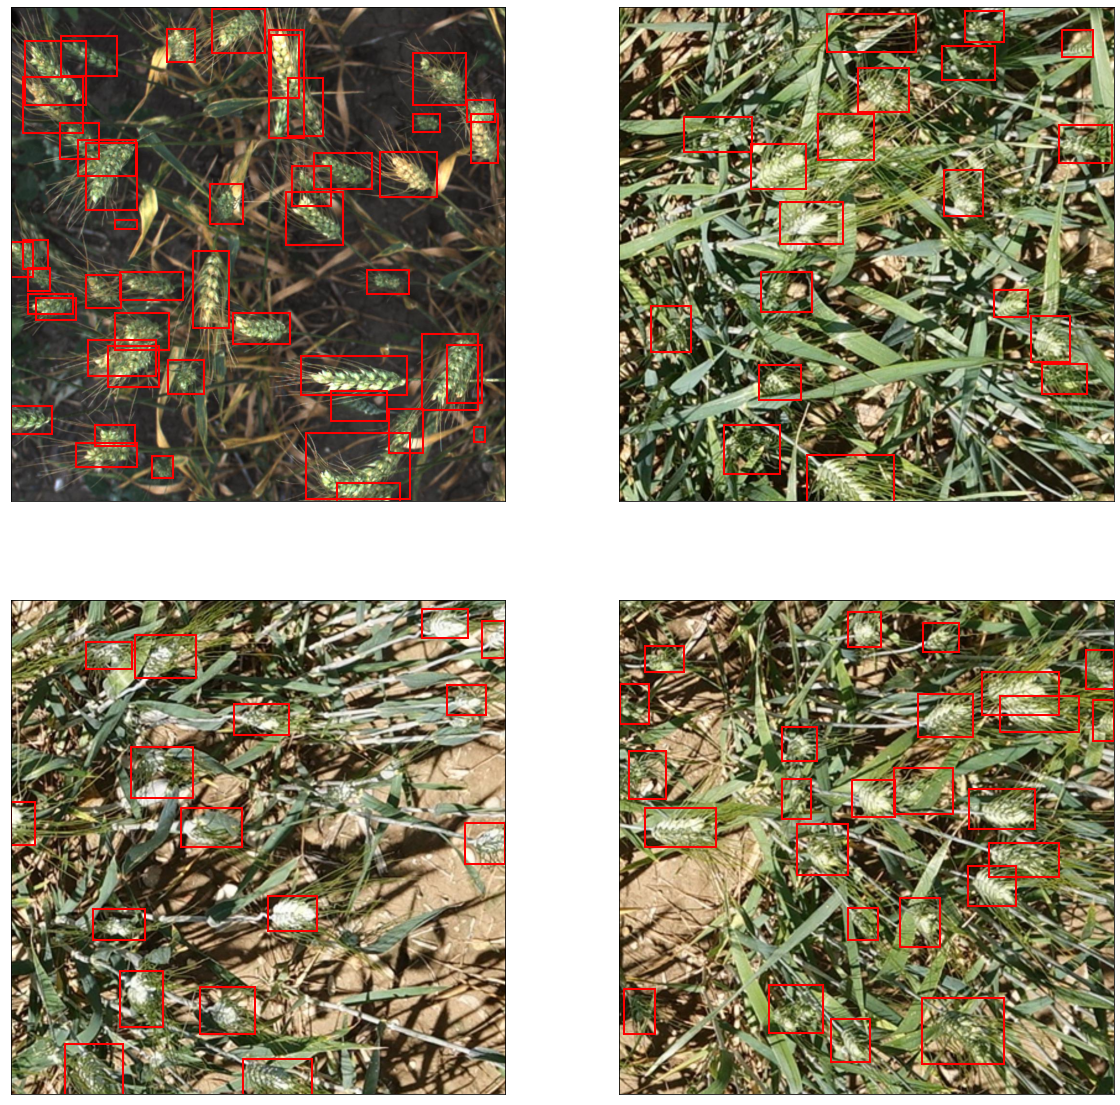

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
count=0
for row in ax:
    for col in row:
        img_id = train_df["image_id"].unique()[-count]
        img = plt.imread(f'{os.path.join(BASE_DIR, "train", img_id)}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        get_bbox(img_id, train_df, col,color='red')
        col.imshow(img)
        count += 1
plt.show()

In [ ]:
image_id = (train_df['image_id'].value_counts() == 116).index[0]
img = plt.imread(f'{os.path.join(BASE_DIR, "train", image_id)}.jpg')

fig, ax = plt.subplots(1, figsize=(12, 12))

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
get_bbox(image_id, train_df, ax, color='red')
ax.imshow(img)
plt.plot()

In [ ]:
all_images = os.listdir(os.path.join(BASE_DIR, 'train'))
all_images = set([x[:-4] for x in all_images])

images_with_bbox = set(list(train_df['image_id']))

images_without_bbox = list(all_images - images_with_bbox)

In [ ]:
print(f'Total number of images without wheat heads: {len(images_without_bbox)}')

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
count=20
for row in ax:
    for col in row:
        img_id = images_without_bbox[count]
        img = plt.imread(f'{os.path.join(BASE_DIR, "train", img_id)}.jpg')
        col.grid(False)
        col.set_xticks([])
        col.set_yticks([])
        col.imshow(img)
        count += 1
plt.show()

#### Vaasu Bisht 
TCR-Innovation Internship Final Project 1 (Global Wheat Detection)